<a href="https://colab.research.google.com/github/intrusnak3/desafios-machine-learning/blob/master/Prediction_heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import warnings





# Analize e preparo do Dataset

In [0]:
warnings.simplefilter(action='ignore', category=FutureWarning)

#carregamento do dataset

dataset = pd.read_csv('Mission_Prediction_Dataset.csv')

In [0]:
#Analize de caracteristicas do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
column1     303 non-null int64
column2     303 non-null int64
column3     303 non-null int64
column4     303 non-null int64
column5     303 non-null int64
column6     303 non-null int64
column7     303 non-null int64
column8     303 non-null int64
column9     303 non-null int64
column10    303 non-null float64
column11    303 non-null int64
column12    303 non-null int64
column13    303 non-null int64
column14    303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [0]:
dataset.shape

(303, 14)

In [0]:
#verificando se existe algum valor null
dataset.isnull().values.any()

False

In [0]:
#alteração do nome das colunas para facilitar o entendimento dos features

dataset.rename(columns={ dataset.columns[0]: "idade", dataset.columns[1]: "sexo" , dataset.columns[2]: "dor-peitoral", 
                        dataset.columns[3]: "psr", dataset.columns[4]: "col" , dataset.columns[5]: "glicose",
                        dataset.columns[6]: "ecg", dataset.columns[7]: "fcmax" , dataset.columns[8]: "angex",
                        dataset.columns[9]: "oldpeak", dataset.columns[10]: "inclinacao" , dataset.columns[11]: "ca", 
                        dataset.columns[12]: "thal", dataset.columns[13]: "alvo"}, inplace=True)

In [0]:
#contagem de valores positivos e negativos na coluna alvo do dataset
dataset.alvo.value_counts()

1    165
0    138
Name: alvo, dtype: int64

In [0]:
#nesse momento o dataset foi dividido entre x = feats e y = targets
x = dataset[['idade','sexo','dor-peitoral','psr','col','glicose','ecg','fcmax','angex','oldpeak','inclinacao','ca','thal',]]
y = dataset.alvo

In [0]:
x.head()

,idade,sexo,dor-peitoral,psr,col,glicose,ecg,fcmax,angex,oldpeak,inclinacao,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


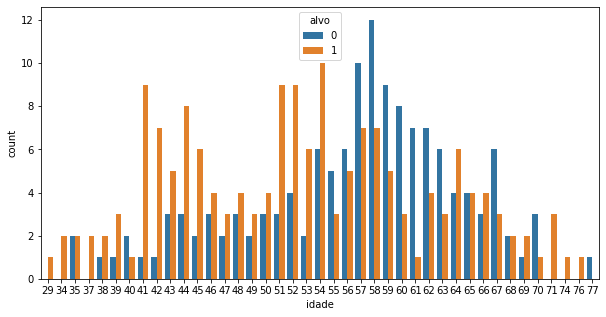

In [0]:
#plot referente ao numero de pesssoas que possuem doenças no coração separado por idade.

sns.countplot( x="idade", hue='alvo', data=dataset)
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()


In [0]:
x_train, x_test, y_train, y_test = train_test_split( x,y, 
    test_size=0.3,  #proporção separada para teste. nesse caso, 30% 
    random_state=42,  #Salvando o estado randomico. pode ser qualquer numero(semente do gerador), 
                      #nesse caso, foi usado o 42 como descrito no desafio
    stratify=y) #amostragem stratificada. instrui a manter a mesma proporção de classes no conjunto de train e test(dataset desbalanceado)

In [0]:
# normalização de dados. foi utilizado para melhorar a eficiencia do modelo KNN e XGBoost
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)

x_test_std = sc.transform(x_test)

# Treinamento utilizando arvore de decisão

In [0]:
tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=3,
                              random_state=1)
tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [0]:
#predileção e verificação da acuracia obtida.
y_pred = tree.predict(x_test)
accuracy_score(y_test, y_pred)

0.7472527472527473

In [0]:
#Analize mais profunda dos resultados da predileção
target_names = ['class 0', 'class 1']
print(classification_report(y_test , 
                            y_pred, 
                            target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.74      0.68      0.71        41
     class 1       0.75      0.80      0.78        50

    accuracy                           0.75        91
   macro avg       0.75      0.74      0.74        91
weighted avg       0.75      0.75      0.75        91



# Treinamento utilizando o KNN

In [0]:
#treinamento e predileção do modelo. foi utilizado aqui os valores escalares utilizando standardScaler 

knn = KNeighborsClassifier()
knn.fit(x_train_std,y_train)
knn.predict
knn.score(x_test_std,y_test)

0.7912087912087912

# Treinamento utilizando Regressão Logistica

In [0]:
#o numero maximo de iterações teve de ser aumentado

clf = LogisticRegression(max_iter=800)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
clf.score(x_test,y_test)


0.7472527472527473

# Treinamento utilizando Random Forest

In [0]:
#utilização do gridSearch para encontrar os melhores parametros
rf = RandomForestClassifier()

param_grid = {
    'max_depth': [2,3,5],
    'min_samples_leaf': [3,5,7],
    'n_estimators': [10,50,100,200],
    'oob_score': [True]
}

# Instanciação do modelo do GridSsearch
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                      cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

# ajustando o gridSearch aos dados
grid_search.fit(x_train, y_train);

grid_search.best_params_
best_grid = grid_search.best_estimator_
print(best_grid.get_params())

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:   10.1s


{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': True, 'random_state': None, 'verbose': 0, 'warm_start': False}


[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   15.9s finished


In [0]:
#treinamento do modelo e predileção, com hiper-parametrização
rf = RandomForestClassifier(**best_grid.get_params())
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
rf.score(x_test,y_test)

0.7912087912087912

# Treinamento utilizando Naive Bayes

In [0]:
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
nb.score(x_test,y_test)


0.7912087912087912

# Treinamento utilizando XGBoost

In [0]:
xg = xgb.XGBRegressor(colsample_bytree = 0.3, learning_rate = 0.1, objective='reg:squarederror' ,
               max_depth = 5, n_estimators = 30)

xg.fit(x_train_std,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=30,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [0]:
preds = xg.predict(x_test_std)

predictions = [round(value) for value in preds]
accuracy_score(y_test, predictions)

0.8461538461538461

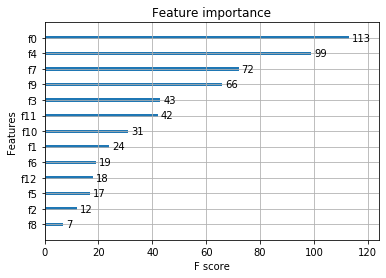

In [0]:
#geração de grafico de importancia dos features
xgb.plot_importance(xg)
plt.rcParams['figure.figsize'] = [7, 5]
plt.show()